Epoch 1/10
782/782 [==============================] - 27s 33ms/step - loss: 1.5981 - accuracy: 0.4111 - val_loss: 1.3224 - val_accuracy: 0.5191
Epoch 2/10
782/782 [==============================] - 27s 35ms/step - loss: 1.2465 - accuracy: 0.5558 - val_loss: 1.2105 - val_accuracy: 0.5641
Epoch 3/10
782/782 [==============================] - 29s 37ms/step - loss: 1.0923 - accuracy: 0.6133 - val_loss: 1.1065 - val_accuracy: 0.6105
Epoch 4/10
782/782 [==============================] - 32s 41ms/step - loss: 1.0001 - accuracy: 0.6484 - val_loss: 1.1055 - val_accuracy: 0.6135
Epoch 5/10
782/782 [==============================] - 28s 35ms/step - loss: 0.9258 - accuracy: 0.6741 - val_loss: 0.9361 - val_accuracy: 0.6759
Epoch 6/10
782/782 [==============================] - 28s 36ms/step - loss: 0.8650 - accuracy: 0.6978 - val_loss: 0.9099 - val_accuracy: 0.6836
Epoch 7/10
782/782 [==============================] - 28s 36ms/step - loss: 0.8150 - accuracy: 0.7159 - val_loss: 0.9028 - val_accuracy:

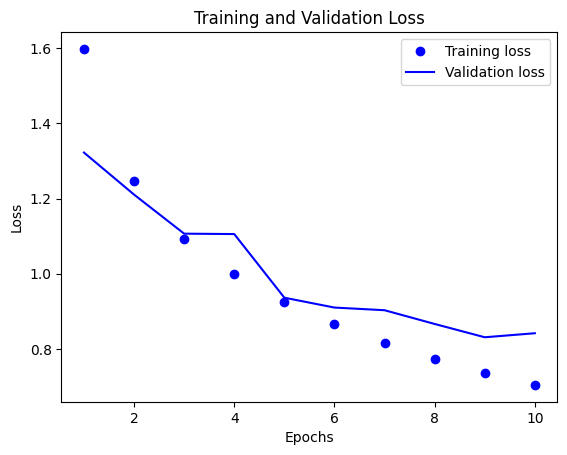

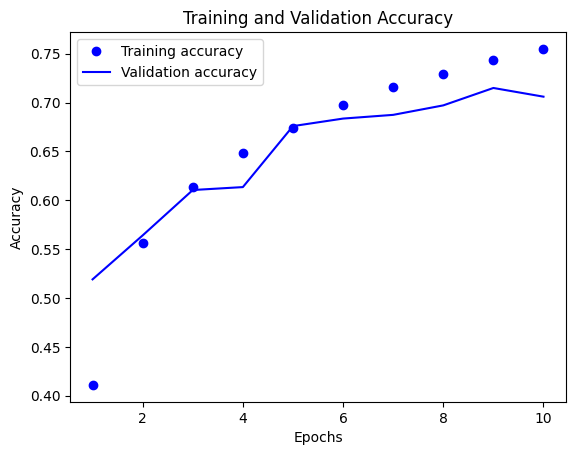

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess the CIFAR-10 dataset
train_data = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test_data = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

train_images = train_data.drop('label', axis=1).values
train_labels = train_data['label'].values

test_images = test_data.drop('label', axis=1).values
test_labels = test_data['label'].values

# Ensure images have the correct shape
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3)).astype('float32')


# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

# Plot the training loss and accuracy
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
